# Product Ranking Optimization | A/B Testing Project

## Problem description
Suppose that an online grocery store called “Rimi” wants to test a new ranking algorithm to provide products more relevant to customers.

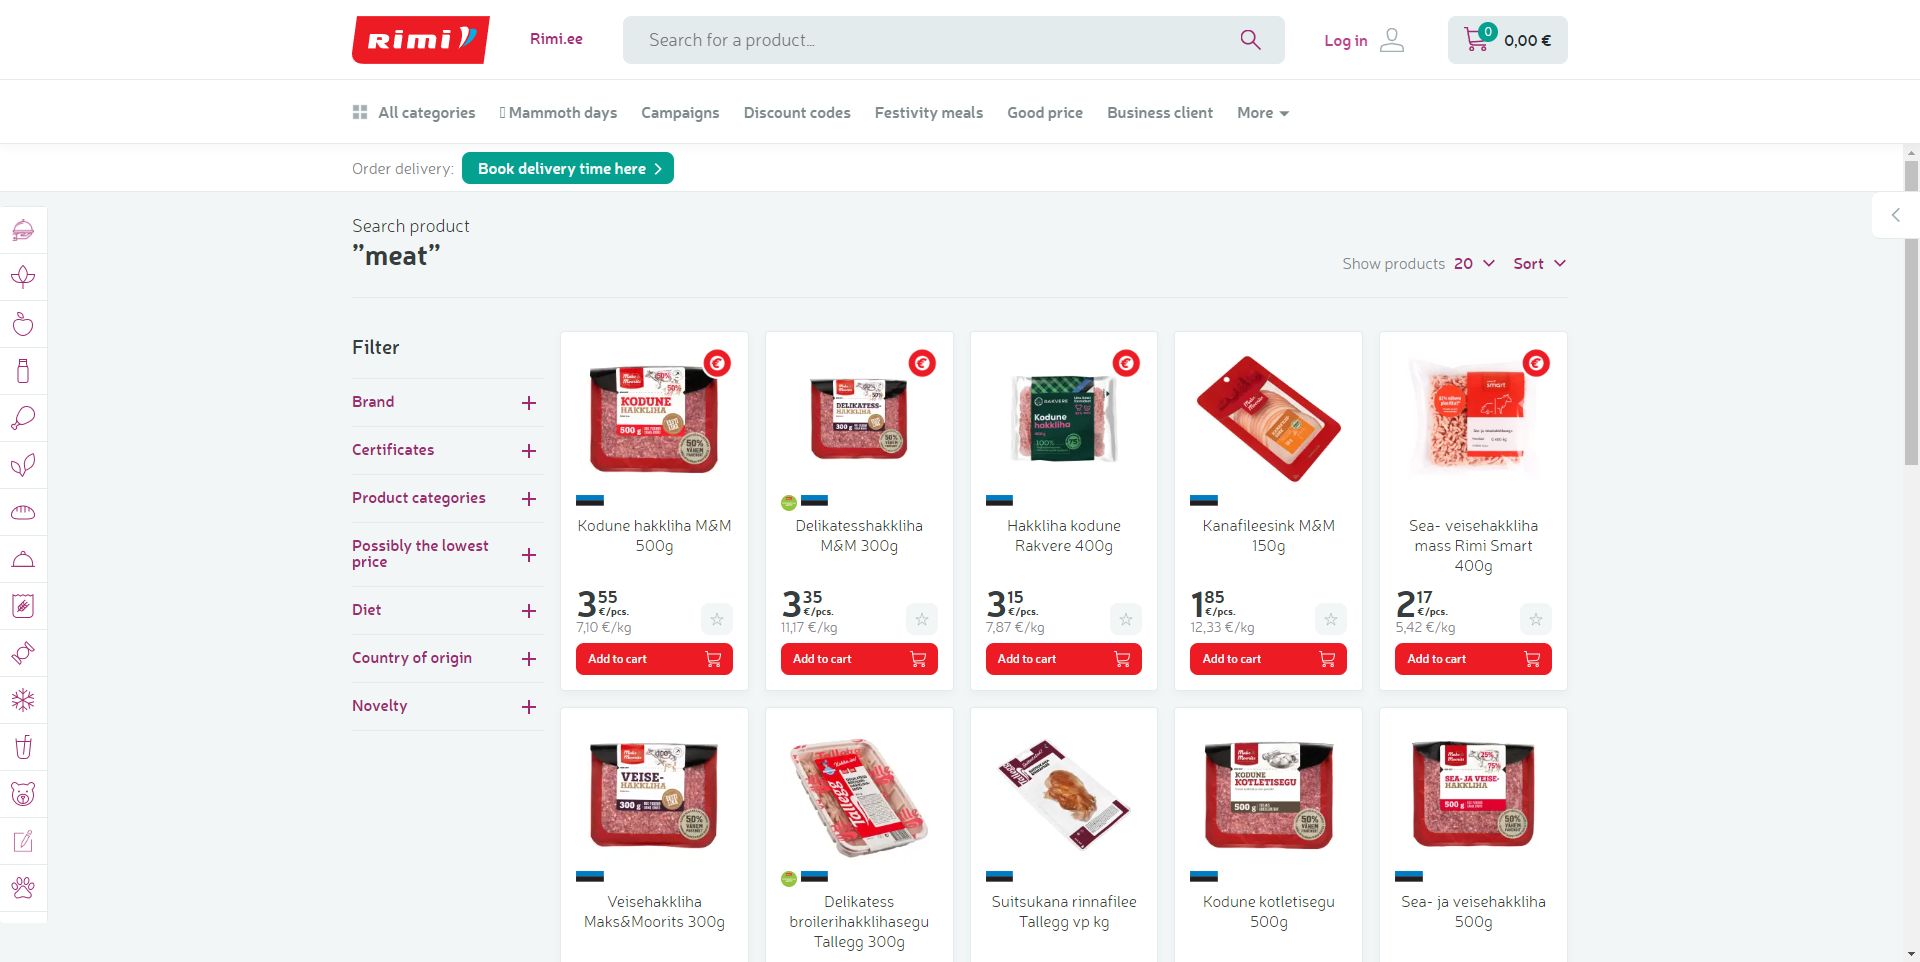



## Methodology

1. **Problem statement** - What is the goal of the experiment?
    - Understanding the nature of the product
    - Asking clarifying questions:
        - What is the user journey?
        - What is the success metric? It should be:
            - Measurable
            - Attributable
            - Sensitive
            - Timely
2. **Hypothesis testing** - What result do you hypothesize from the experiment?
    - Set up: 
        - Null hypothesis 
        - Alternative hypothesis 
        - Significance level
        - Statistical power
        - Minimum detectable effect (MDE)
3. **Design the Experiment** - What are your experiment parameters?
    - Determine:
        - Randomization unit
        - Target population in the experiment
        - Sample size
        - Duration of the experiment
4. **Run the Experiment** - What are the requirements for running an experiment?
    - Set up the necessary instrumentation to:
        - Collect data 
        - Analyze the results
    - Avoid peeking p-values
5. **Validity Checks** - Did the experiment run soundly without errors or bias?
    - Check for:
        - Instrumentation Effect
        - External Factors
        - Selection Bias
        - Sample Ratio Mismatch
        - Novelty Effect
6. **Interpret Results** - Is the observed change in the metric both statistically and practically significant?
    - Assess the observed lift:
        - P-value
        - Confidence intervals
7. **Launch Decision** - Based on the results and trade-offs, should the change be launched?
    - Consider:
        - Metric Trade-Offs
        - Cost of Launching
        - Risk of committing false positive (Type 1 Error)

## Step 1 - Problem Statement

### Understanding the Nature of the Product

Rimi is an online grocery store that offers a wide range of products, including fresh produce, meat, dairy, baked goods, and more. The store uses a product ranking system or recommendation algorithm.

When a user enters keywords such as "meat" or "fruits," this algorithm generates a list of products that could be relevant to that customer, based on factors like their profile, purchase history, and other data.

If we modify this ranking algorithm, the suggested products may become more relevant to customers, which in turn should **boost sales** for the online store.


### User Journey 

![user_funnel.drawio.png](images\user_funnel.drawio.png)

Considering the user journey is crucial because it helps determine key factors later on, such as defining the success metric, identifying the target user population, and deciding at which stage of the journey a user should be considered as a participant in the experiment.

### Define the Success Metric

To define the success metric, we need to consider the folowing guiding princeples:
1. **Measurable**
    - Is it a type of user behavior that can be accurately captured through your instrumentation or platform?
2. **Attributable**
    - "Attributable" means establishing a clear link between the experiment and the observed changes in metrics.
    - Example: If you are testing a new website design (treatment) and notice an increase in conversions (metric), for the result to be considered "attributable," you need to be sure that the increase is specifically due to the design change, and not, for example, due to an increase in traffic or a marketing campaign that occurred during the same period.
3. **Sensitive**
    - A metric is considered "sensitive" if it is responsive enough to detect significant effects from the applied modification.
    - You want to identify a metric with low variability to increase the likelihood of detecting true effects.
4. **Timely**
    - A/B experiments need to be very quick, it's a very iterative process as a way to improve the product very quickly.
    - Therefore, consider what short-term behavior can serve as a proxy for the long-term desired behavior.


Our success metric is **Average Revenue Per User (ARPU)**, which we aim to increase. However, it's crucial that this improvement does not come at the expense of the **Conversion Rate**, which should remain stable or improve.


## Step 2 - Hypothesis testing


### State the Hypothesis Statement

**Null Hypothesis (H0)**: The average revenue per user (ARPU) between the old and new ranking algorithms is the same.

**Alternative Hypothesis (Ha)**: The average revenue per user (ARPU) between the old and new ranking algorithms is different.



### Set the Significance Level

**Alpha** = 0.05 <br> 
If the p-value is less than 0.05, reject H0 and conclude that Ha is true.



### Set the Statistical Power

**Statistical Power** = 0.8 <br> 
Statistical power is the probability of detecting an effect if the alternative hypothesis is true.



### Set the Minimum Detectable Effect (MDE)

**MDE** = 3% <br> 
If the change in ARPU is at least 3% or higher, it is considered practically significant.

## Step 3 - Design the Experiment

### Set the Randomization Unit

**Randomization Unit** = User <br>
This unit determines how participants are randomly assigned to groups (control and test) for conducting the experiment. Individual User the most common randomization unit, especially in digital A/B tests.


### Target Population in the Experiment

![user_funnel.drawio.png](images\user_funnel.drawio.png)